# Plots of the CanESM5 spinup with prescribed SST and sea-ice annual cycle.

We want to show here that the timeslice simulation we did repreating 1870 forcing and appropriate mean annual cycle SSTs and sea-ice has come into a quasi-equilibrium.  This is mainly the land carbon fields.  Make use of the rtd plots since I did not save the full output for the duration of spinup.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as py

/home/scrd102/cccma_conda/envs/py3_analysis_v2/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Read in the RTDs for p1 and p2 versions of the model

In [2]:
data_dir="/space/hall5/sitestore/eccc/crd/ccrn/users/jcl001/PROJECTS/CanAM5_paper/rtds/"
p1_file=data_dir+"sc_p1_o_ts_1870_1870_2269_rtd074.nc"
p2_file=data_dir+"sc_p2_o_ts_1870_2070_2269_rtd074.nc"

In [3]:
ds_p1=xr.open_dataset(p1_file)
ds_p2=xr.open_dataset(p2_file)

Read in the land carbon related data

In [4]:
p1_chum = ds_p1.SOIL_CARBON_MASS__PG_C________________________ANN_00001.data
p2_chum = ds_p2.SOIL_CARBON_MASS__PG_C________________________ANN_00001.data
p1_cfnb = ds_p1.NET_BIOME_PRODUCTIVITY__PG_CpYR_______________ANN_00001.data
p2_cfnb = ds_p2.NET_BIOME_PRODUCTIVITY__PG_CpYR_______________ANN_00001.data

p1_sm1 = ds_p1.TOTAL_SOIL_MOISTURE_LAND__KGpM2_______________ANN_00001
p1_sm2 = ds_p1.TOTAL_SOIL_MOISTURE_LAND__KGpM2_______________ANN_00002
p1_sm3 = ds_p1.TOTAL_SOIL_MOISTURE_LAND__KGpM2_______________ANN_00003
p1_sm = p1_sm1+p1_sm2+p1_sm3

p2_sm1 = ds_p2.TOTAL_SOIL_MOISTURE_LAND__KGpM2_______________ANN_00001
p2_sm2 = ds_p2.TOTAL_SOIL_MOISTURE_LAND__KGpM2_______________ANN_00002
p2_sm3 = ds_p2.TOTAL_SOIL_MOISTURE_LAND__KGpM2_______________ANN_00003
p2_sm = p2_sm1+p2_sm2+p2_sm3

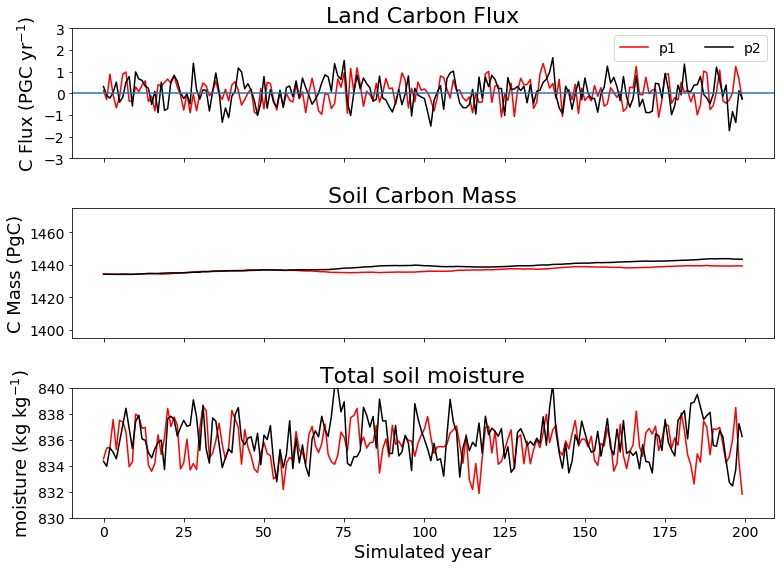

In [6]:

py.figure(figsize=[11,8])

py.subplot(3,1,1)
py.plot(p1_cfnb[200:],'r-',label="p1")
py.plot(p2_cfnb,'k-',label="p2")
py.ylim([-3,3])
py.axhline()
py.title("Land Carbon Flux",fontsize=22)
py.ylabel(r"C Flux (PGC yr$^{-1}$)",fontsize=18)
py.legend(ncol=2,fontsize=14)
py.xticks(color='w')
py.yticks(fontsize=14)

py.subplot(3,1,2)
py.plot(p1_chum[200:],'r-',
        p2_chum,'k-')
# Mean = 1435
py.ylim([1395,1475])
py.xticks(color='w')
py.yticks(fontsize=14)
py.title("Soil Carbon Mass",fontsize=22)
py.ylabel("C Mass (PgC)",fontsize=18)

py.subplot(3,1,3)
py.plot(p1_sm[200:],'r-',
        p2_sm,'k-')
py.ylim([830,840])
#py.axhline()
py.title("Total soil moisture",fontsize=22)
py.ylabel(r"moisture (kg kg$^{-1}$)",fontsize=18)
py.xlabel("Simulated year",fontsize=18)
py.xticks(fontsize=14)
py.yticks(fontsize=14)

py.tight_layout()